<a href="https://colab.research.google.com/github/MargaritaFateeva/att_work02/blob/main/02_AttWork_FateevaMA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Описание бизнес кейса**

Вам будут даны несколько кейсов для разных бизнесов с описанием бизнес задачи, которую необходимо решить:


#**1) Ваш продукт - это школа английского языка Лендинг для языковой школы https://english22.tilda.ws/. Проанализируйте конкурентов на рынке (SkyEng, Lingvoleo и прочие) и сформулируйте гипотезу по улучшению первого экрана лендинг.**

РЕШЕНИЕ:

Продукт - лендинг школы английского языка

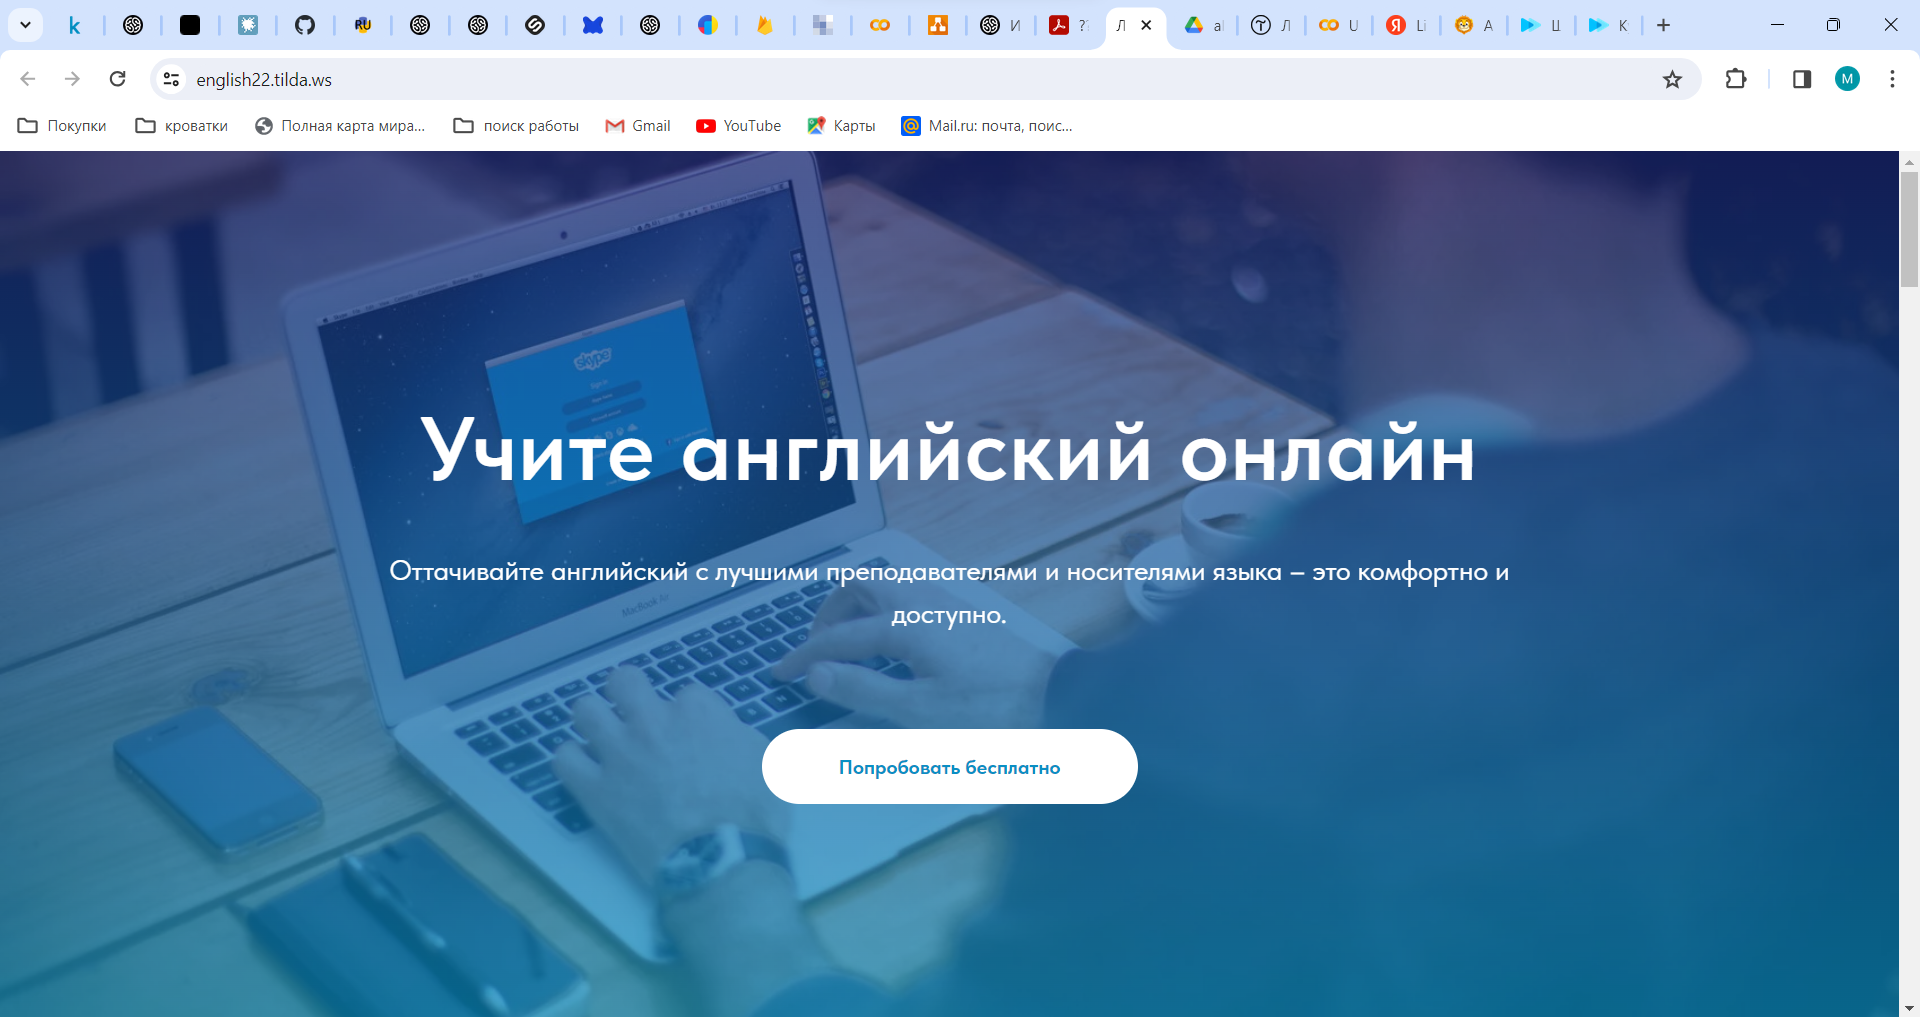

Обратимся для сравнения к первому экрану сайтов конкурентов SkyEng и Lingvoleo.

В SkyEng на первом экране название компании шапка с основными разделами, кнопка войти для авторизованных пользователей и иконка на чат для вопросов - классический оптимальный вариант сайта.

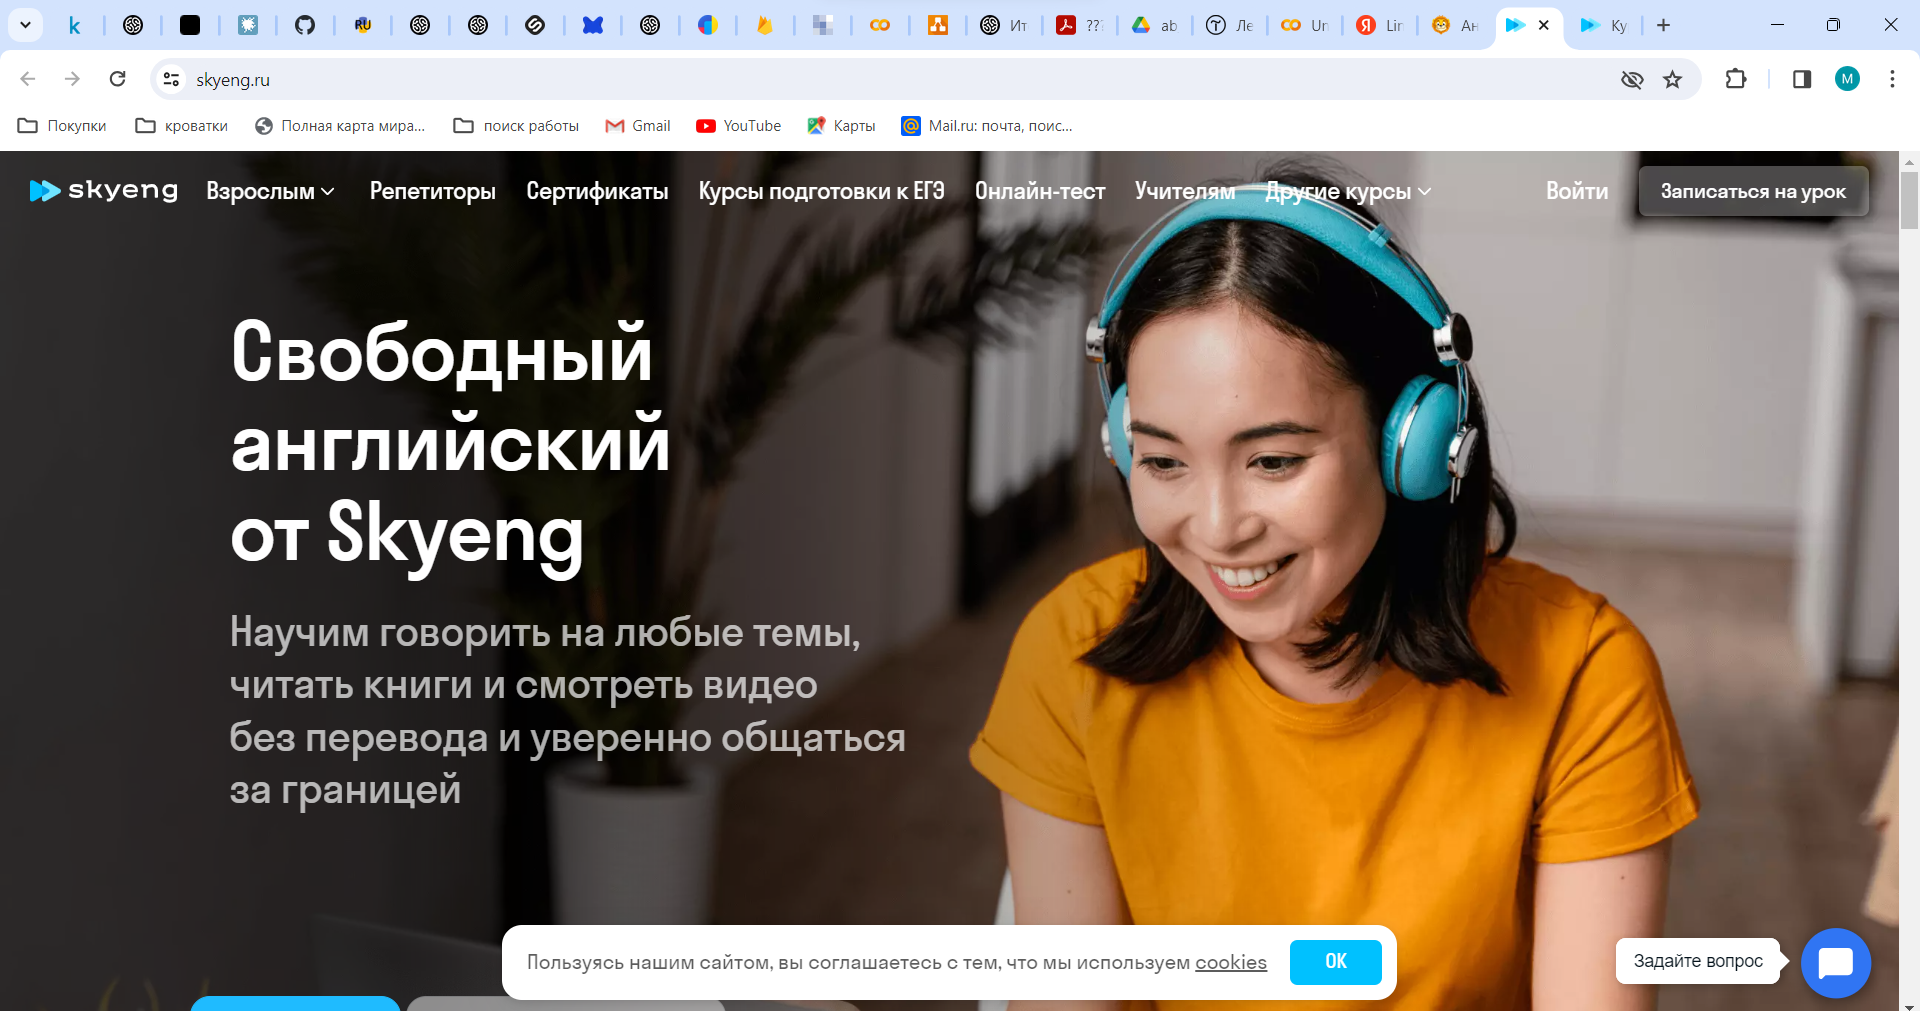

В Lingvoleo также название школы и кнопка для регистрации на сайте.

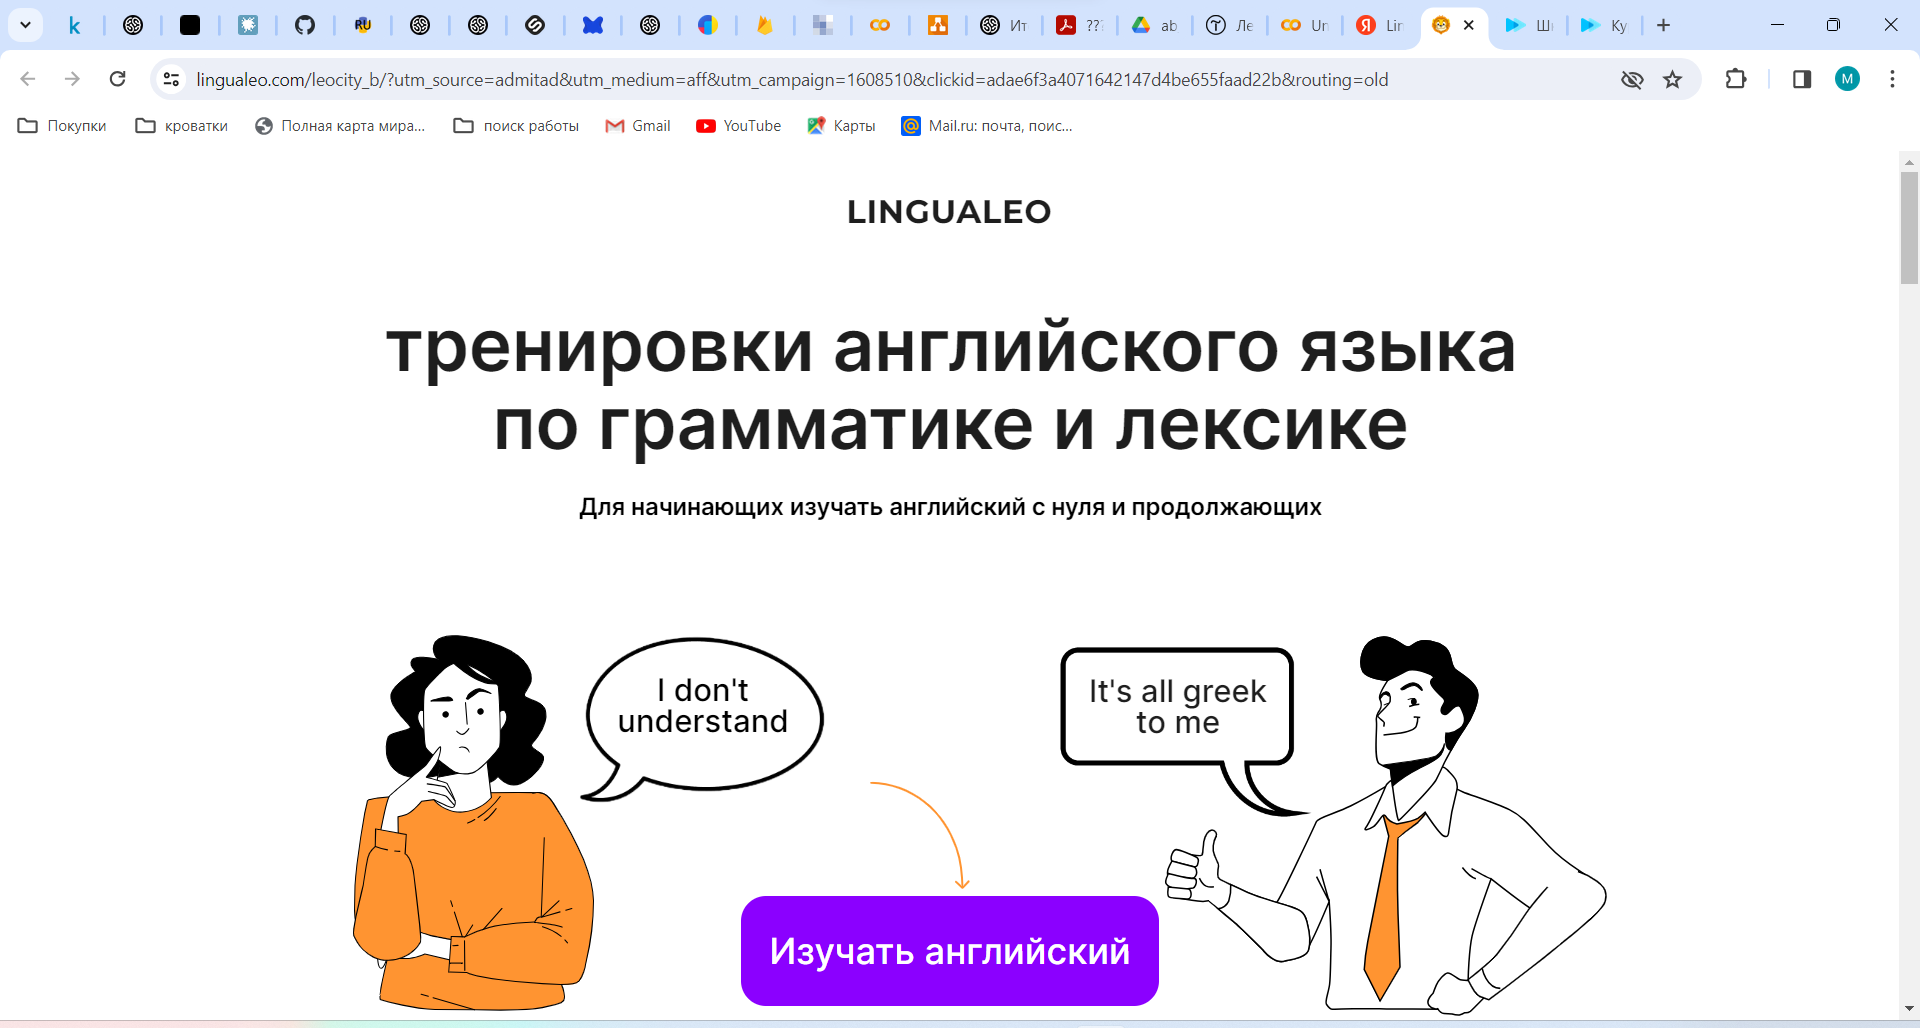

В нашем продукте на первом экране нет информации о навзании компании, нет шапки с разделами по обучению, входа для авторизованных пользователей и кнопки чата поддержки.
На основе сравнительного анализа 3 сайтов сформулируем ипотезу по улучшению первого экрана лендинга:

**Действие** добавить в верхней части сайта шапку с названием компании и разделами сайта **для пользователей** всех **позволит увеличить метрику** конверсия **на величину** 5%, **потому что** будет понятна структура сайта и видна информации о компании и услугах.

#**2) Подведите результаты эксперимента в экселе по следующим данным: ab_stats.csv - Google Диск: Стат значимо ли отличается ARPPU в двух группах ? Какие рекомендации дадите менеджеру?**

РЕШЕНИЕ:

ARPPU (Average Revenue per Paying User — средний доход на платящего пользователя) — эта метрика показывает средний доход от одного платящего пользователя за определенный период: день, месяц или год.

Формула расчета: Monthly Recurring Revenue = Доход / Количество покупателей

https://drive.google.com/file/d/1EOOPPtCfIfVOleonWE3sVfUBa0uebBLr/view?usp=drive_link


In [2]:
from scipy.stats import ttest_1samp
import numpy as np
import pandas as pd
import seaborn as sns

from scipy import stats
import statsmodels.api as sm
from matplotlib import pyplot as plt


In [5]:
from google.colab import drive
drive.mount('/content/drive')


data1 = pd.read_csv('/content/drive/MyDrive/ab_stats.csv')

data1.head(10)

Mounted at /content/drive


revenue  num_purchases  purchase ab_group  av_site visit
0      0.0              0         0        A       9.040174
1      0.0              0         0        A       4.811628
2      0.0              0         0        A       7.342623
3      0.0              0         0        A       7.744581
4      0.0              0         0        A      10.511814
5      0.0              0         0        A       9.578727
6      0.0              0         0        A       6.162601
7      0.0              0         0        A      11.909452
8      0.0              0         0        A       6.540910
9      0.0              0         0        A       7.990794

In [6]:
data = data1.rename(columns={'av_site visit': 'av_site_visit'})

In [7]:
data.head(10)

revenue  num_purchases  purchase ab_group  av_site_visit
0      0.0              0         0        A       9.040174
1      0.0              0         0        A       4.811628
2      0.0              0         0        A       7.342623
3      0.0              0         0        A       7.744581
4      0.0              0         0        A      10.511814
5      0.0              0         0        A       9.578727
6      0.0              0         0        A       6.162601
7      0.0              0         0        A      11.909452
8      0.0              0         0        A       6.540910
9      0.0              0         0        A       7.990794

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23652 entries, 0 to 23651
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   revenue        23652 non-null  float64
 1   num_purchases  23652 non-null  int64  
 2   purchase       23652 non-null  int64  
 3   ab_group       23652 non-null  object 
 4   av_site_visit  23652 non-null  float64
dtypes: float64(2), int64(2), object(1)
memory usage: 924.0+ KB


In [9]:
data.describe()

revenue  num_purchases      purchase  av_site_visit
count  23652.000000   23652.000000  23652.000000   23652.000000
mean       0.324689       0.043590      0.020717       7.013112
std        9.557730       1.079403      0.142438       3.154584
min        0.000000       0.000000      0.000000     -12.073486
25%        0.000000       0.000000      0.000000       5.173787
50%        0.000000       0.000000      0.000000       7.007936
75%        0.000000       0.000000      0.000000       8.864119
max     1303.609284     152.000000      1.000000      22.446822

In [10]:
data.isna().sum()

revenue          0
num_purchases    0
purchase         0
ab_group         0
av_site_visit    0
dtype: int64

In [11]:
data.ab_group.value_counts()

A    11835
B    11817
Name: ab_group, dtype: int64

In [12]:
data.purchase.value_counts()

0    23162
1      490
Name: purchase, dtype: int64

In [13]:
data.num_purchases.value_counts()

0      23162
1        346
2         65
3         34
4         15
5         11
6          9
7          3
10         1
8          1
36         1
152        1
25         1
17         1
15         1
Name: num_purchases, dtype: int64

Дубликатов нет, A и B группы близкое количество значений - система сплитования корректна. Доля платящих пользователей в выборке незначительна.
В дальнейшем анализе используем исходные данные без корректировок и исключений

In [14]:
data_arppu = data.groupby("ab_group").agg({"revenue":"sum", "num_purchases":"sum","purchase":"sum", "av_site_visit":"mean"})
data_arppu

revenue  num_purchases  purchase  av_site_visit
ab_group                                                     
A         4786.807972            600       256       6.974724
B         2892.735789            431       234       7.051559

Нет данных по периоду за который представлены данные в таблице.
Рассчитываем ARPPU по всем имеющимся данным.

ARPPU = SUM revenue / Count purchase

In [15]:
arppu = data_arppu.revenue/data_arppu.purchase
arppu

ab_group
A    18.698469
B    12.362119
dtype: float64

Средний доход на платящего пользователя по группе А выше чем в группе В.
Расчитаем ARPPU общий по выборке где совершалась покупка, без разбивки на тестовые группы.

In [16]:
data_pur=data[data['purchase']==1]
data_pur

revenue  num_purchases  purchase ab_group  av_site_visit
45      1.885595              1         1        A       7.654627
54      1.002159              1         1        A       6.392489
82      2.990000              1         1        A       8.596604
104    49.990000              1         1        A       8.885633
110    22.093757              4         1        A       8.708759
...          ...            ...       ...      ...            ...
23426   2.489611              1         1        B       9.015714
23493  74.950000              5         1        B       5.881950
23495   3.667866              1         1        B       7.450014
23584  19.990000              1         1        B       9.813696
23616   2.453401              1         1        B      11.909353

[490 rows x 5 columns]

In [17]:
arppu_all=data_pur.agg({"revenue":"sum", "num_purchases":"sum","purchase":"sum", "av_site_visit":"mean"})
arppu_koef = arppu_all.revenue/arppu_all.purchase
arppu_koef

15.672538287755097

Общий ARPPU получился средним значением для тестовой и конторльной группы.
A    18.698469
B    12.362119

Проверка на нормальность дааных доход тестовой и контрольной группы юзеров с покупкой.
По гистограмме видим явное отличие от нормального распределения.

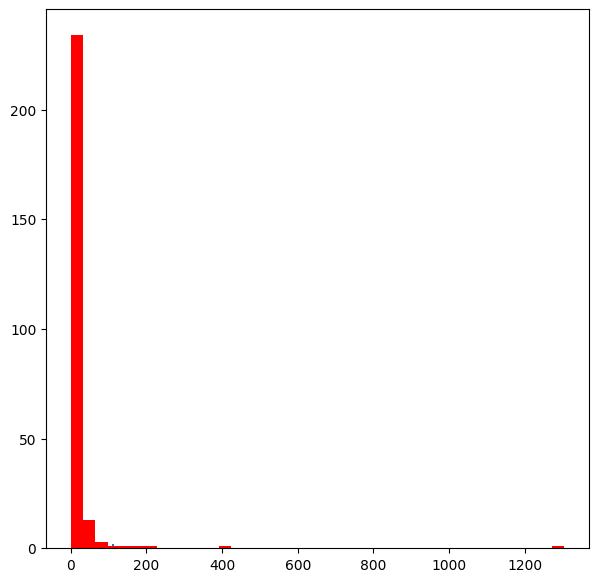

In [18]:
plt.figure(figsize=(7, 7))
control_revenue = data_pur['revenue'][(data_pur['ab_group'] == 'A')]
test_revenue =data_pur['revenue'][(data_pur['ab_group'] == 'B')]
plt.hist(test_revenue,  bins=20)
plt.hist(control_revenue, color='r', bins=40)

plt.show()

In [19]:
data_pur.groupby('ab_group')['revenue'].describe()

count       mean        std       min       25%      50%        75%  \
ab_group                                                                        
A         256.0  18.698469  87.527589  0.259689  2.318301  4.28316  11.923141   
B         234.0  12.362119  19.007065  0.259373  2.319883  3.98000  12.274829   

                  max  
ab_group               
A         1303.609284  
B          113.830000

Проверим на нормальность каждую группу тест Шапиро-Уилка (выборка до 5000 наблюдений) где нулевая гипотеза о нормальное распределение.

In [21]:
stats.shapiro(control_revenue)

ShapiroResult(statistic=0.1513245701789856, pvalue=2.4723388038366e-32)

In [22]:
stats.shapiro(test_revenue)

ShapiroResult(statistic=0.6179500818252563, pvalue=1.599590675565433e-22)

Подтверждаем в обоих случаях h1 об отличие от нормального распределения - фактическое pvalue меньше 5%.

Т.К распределнение отлично от нормального применяем непараметрический тест Манна-Уитни, где H0 нет статистически значимых различий в группах

In [20]:
stats.mannwhitneyu(x=data_pur[(data_pur['ab_group'] == 'A')]['revenue'].values,
                   y=data_pur[(data_pur['ab_group'] == 'B')]['revenue'].values)

MannwhitneyuResult(statistic=29729.5, pvalue=0.8871956616344514)

pvalue > 0.05 значит принимаем нулевую гипотезу что **в тестовой и контрольной группе нет статистически значимых различий**.

В связи с отсутвием статистически значимых различий относительно доходов с платящего пользователя не выкатываем изменения, оставить вариант A.
Рассчетные значения ARPPU по группам также выше в группе A(A    18.698469
B    12.362119)

Рекомендации провести другие A/B тесты с целью выявления статистически значимых различий в группах и увеличения ARPPU от этих фичей.


#**3) Мы хотим провести А/Б-тест для трех источников трафика. Нынешняя конверсия равна 5%, мы ожидаем прирост в 0,2%. Уровень доверия 97% и уровень мощности 87%. Всего на наш продукт заходит 40 000 пользователей в месяц.**

**3.1) За сколько дней мы сможем протестировать гипотезу? И что вы можете посоветовать по ре3зультатам подсчета?**



РЕШЕНИЕ:

Конверсия — это метрика работы сайта. Она показывает долю посетителей, которые совершили целевое действие. Для данной метрики долей будем использовать рассчет доверительного интервала. Критерии в данном случае Z критерий долей или Хи-квадрат.

Для рассчета размера выборки используем калькулятор для метрик долей. Для рассчета используем uplift по условию задачи +0,2%.
Проверка: 5% * 1.002 = 5,01% - абсолютное предполагаемое значение uplift=(b/a-1)100%=(5,01/5 - 1)*100 = 0,2% (верно)

Рассчет для относительного изменения

alfpa=3%
Beta = 13%

На сайте мощность взяла 15%

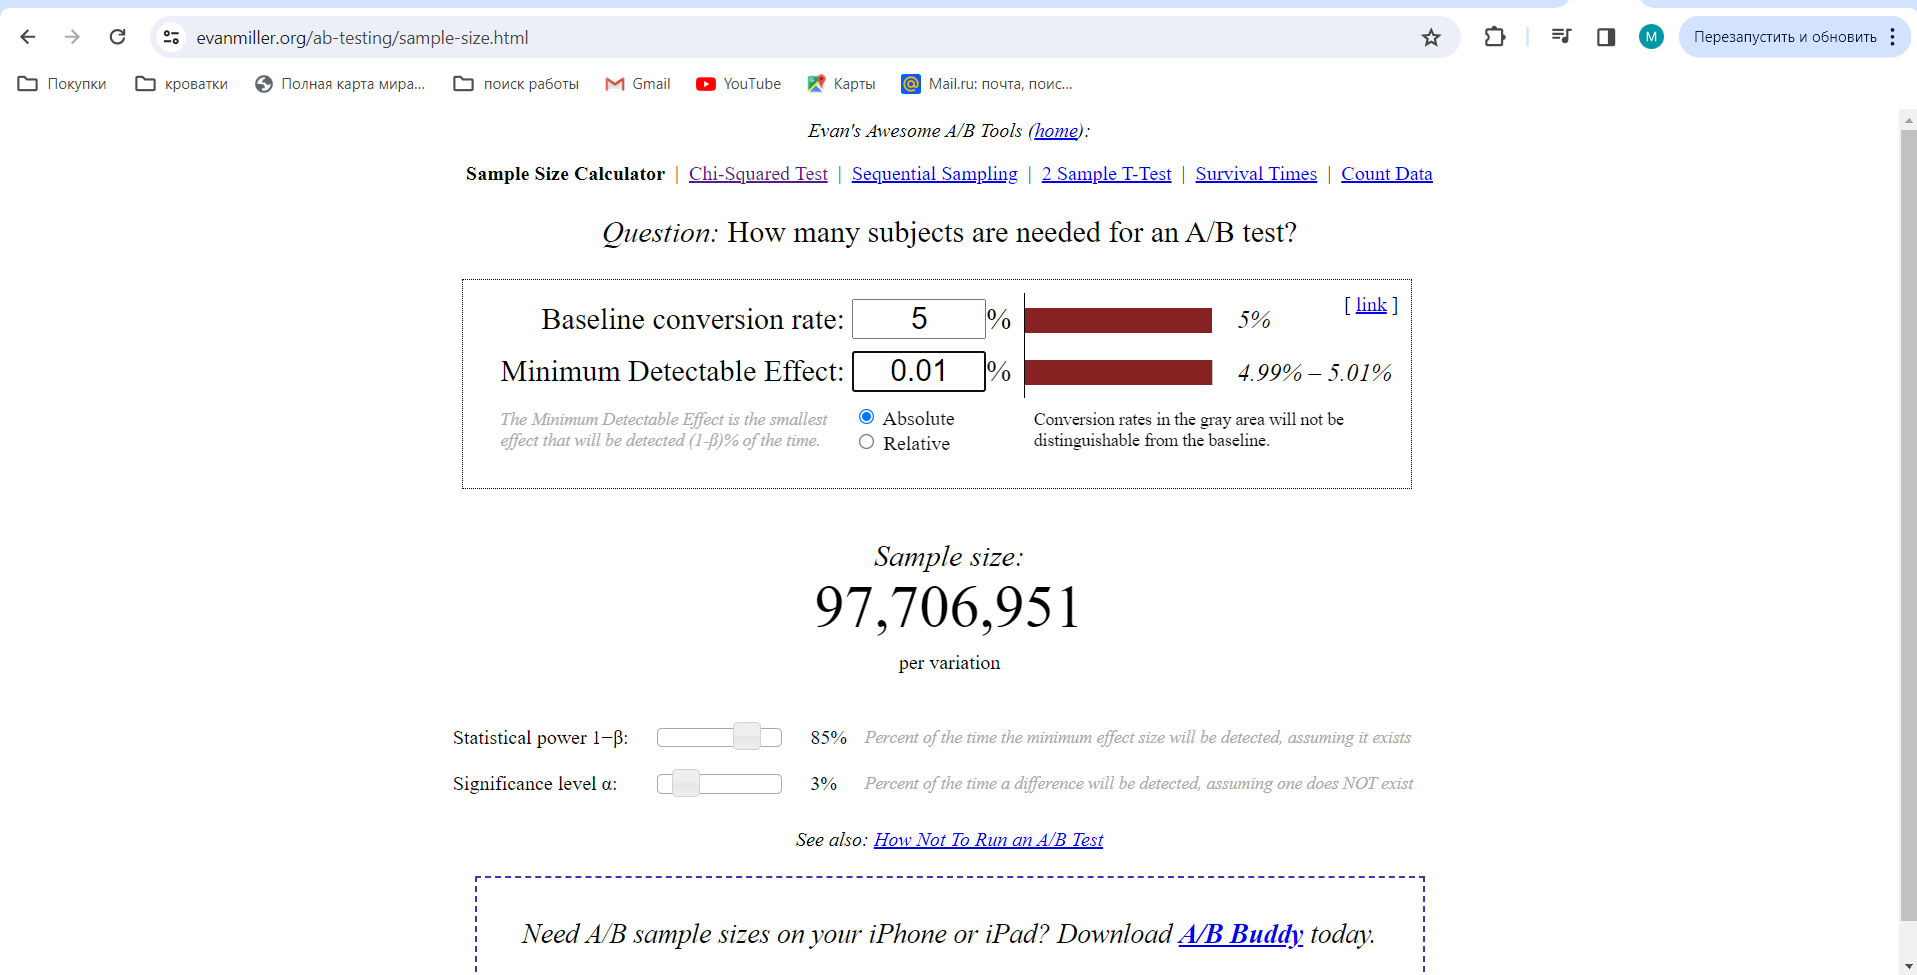

97 706 951*2 = 293 120 853 размер 3 выборок контрольной группы и двух тестовых

293 120 853 / 40000 = 7 328,02 месяцев

То есть нужно 7 328 месяцев для проведения эксперимента - тк предполагаемый uplift минимальный для оценки нужна очень большая выборка

610 лет срок неприемлемый для проведения A/B теста - он будет попросту неактуален даже через полгода.

Рекомендации **пересмотреть гипотезу взять более значимый uplift прирост конверсии**, снижение мощности теста и уровня доверия не окажут влияния на сроки проведения эксперимента при таких данных прироста - слишком мал для тестирования.

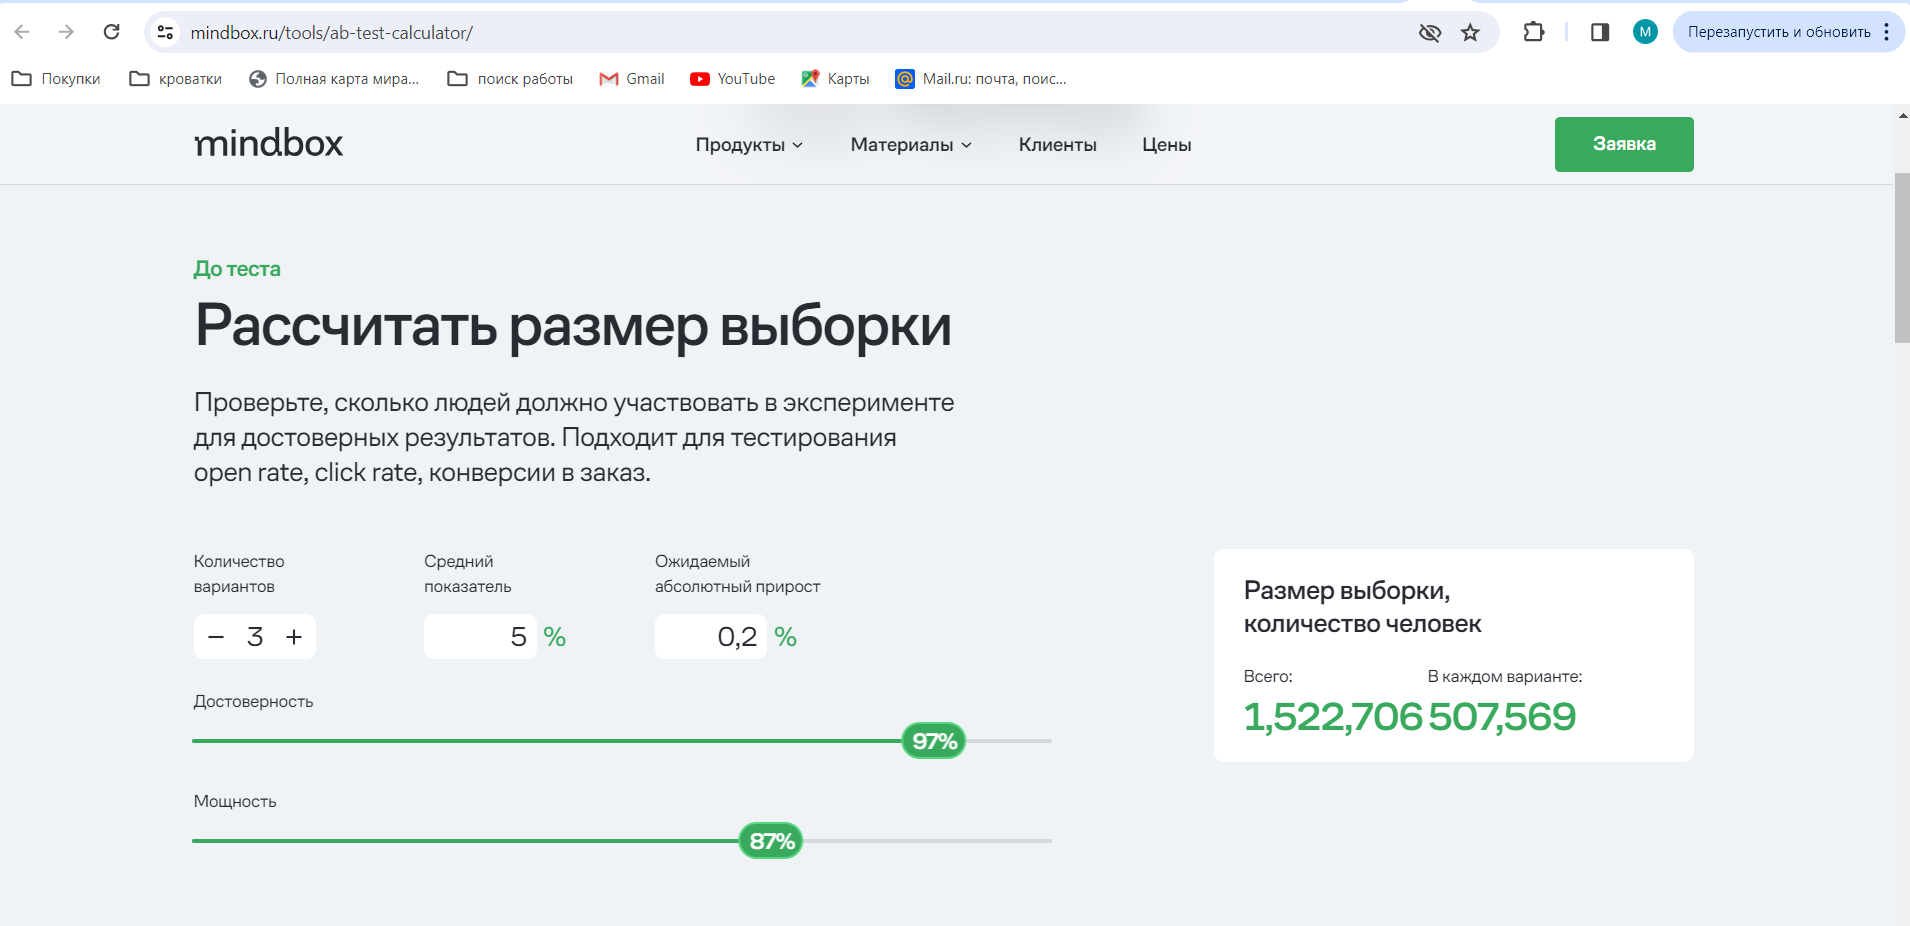

В другом калькуляторе
1522706/40000 = 38,06 месяцев для теста - более 3 лет также неприемлемый срок для теста.

Рекомендации **пересмотреть гипотезу взять более значимый uplift прирост конверсии**, снижение мощности теста и уровня доверия не окажут влияния на сроки проведения эксперимента при таких данных прироста - слишком мал для тестирования.

#**3.2) Допустим в задаче нет проблемы с количеством посетителей на сайт, тогда подведите результаты тестирования, если у нас следующие результаты по количеству конверсии:**

**1) 25 000**

**2) 30 000**

**3) 32 000**

РЕШЕНИЕ:

Воспользуемся калькулятором

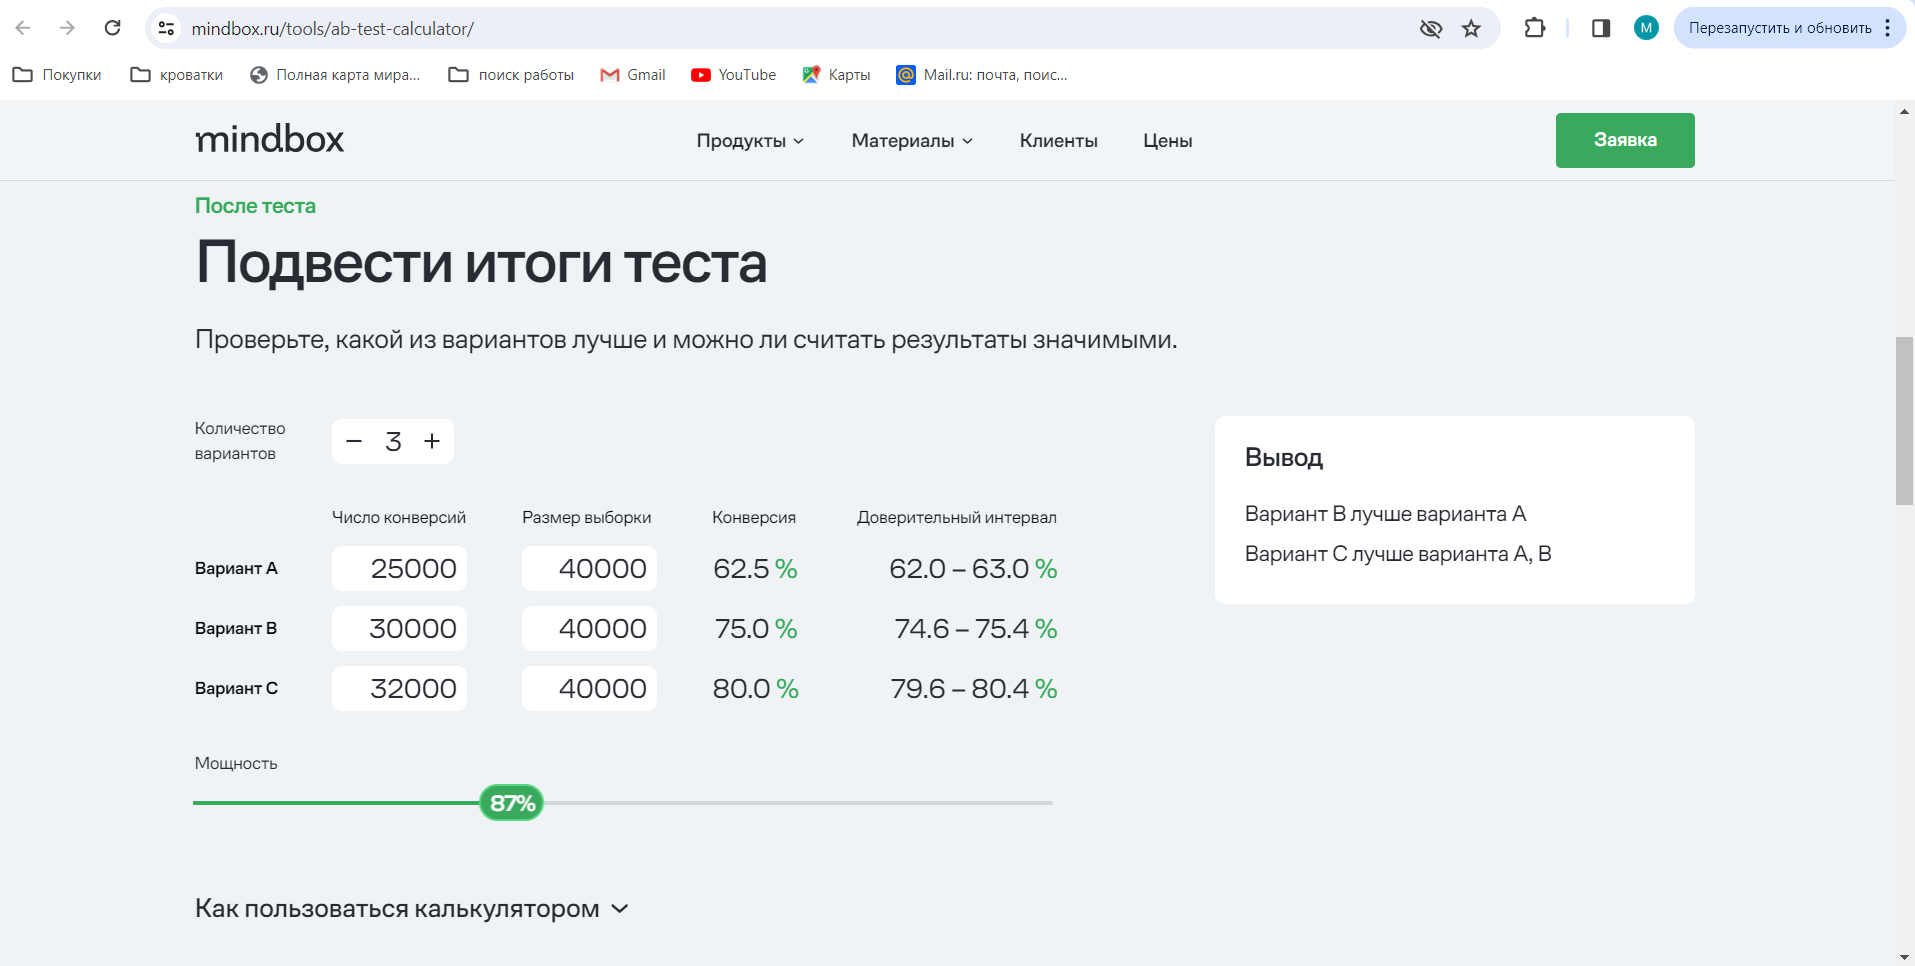

**Вариант С наилучший из трех предложенных.**

#**4) Вы решили сравнивать метрику CPA в двух группах. Размер выборки - 2350 элементов в каждой группе. Для проверки нормальности распределения на выборке в 2350 наблюдений применили , критерий Шапиро-Уилка и получили p-value, равный 0.00002, alpha = 5%.**

**Какой бы вывод мы могли сделать в данном случае?**

**В этом случае какой статистический критерий для проверки первоначальной гипотезы тут лучше всего подойдёт и почему ?**

РЕШЕНИЕ:

ПО критерию Шапиро-Уилка p-value= 0.00002, alpha = 5% - p-value<alpha - значит отвергаем нулевую гипотезу о нормальном распределении (выборка 2350*2=4700 до 5000 наблюдений критерий используется верно).
Значит для проверки A/B теста используем непараметрический критерий.

CPA (Cost per Action — стоимость за действие) — эта метрика показывает стоимость целевого действия на сайте.

Непрерывная количественная метрика, закону нормального распределния не подчиняется.

Для независимых выборок тестовых групп используем критерий Манна-Уитни.


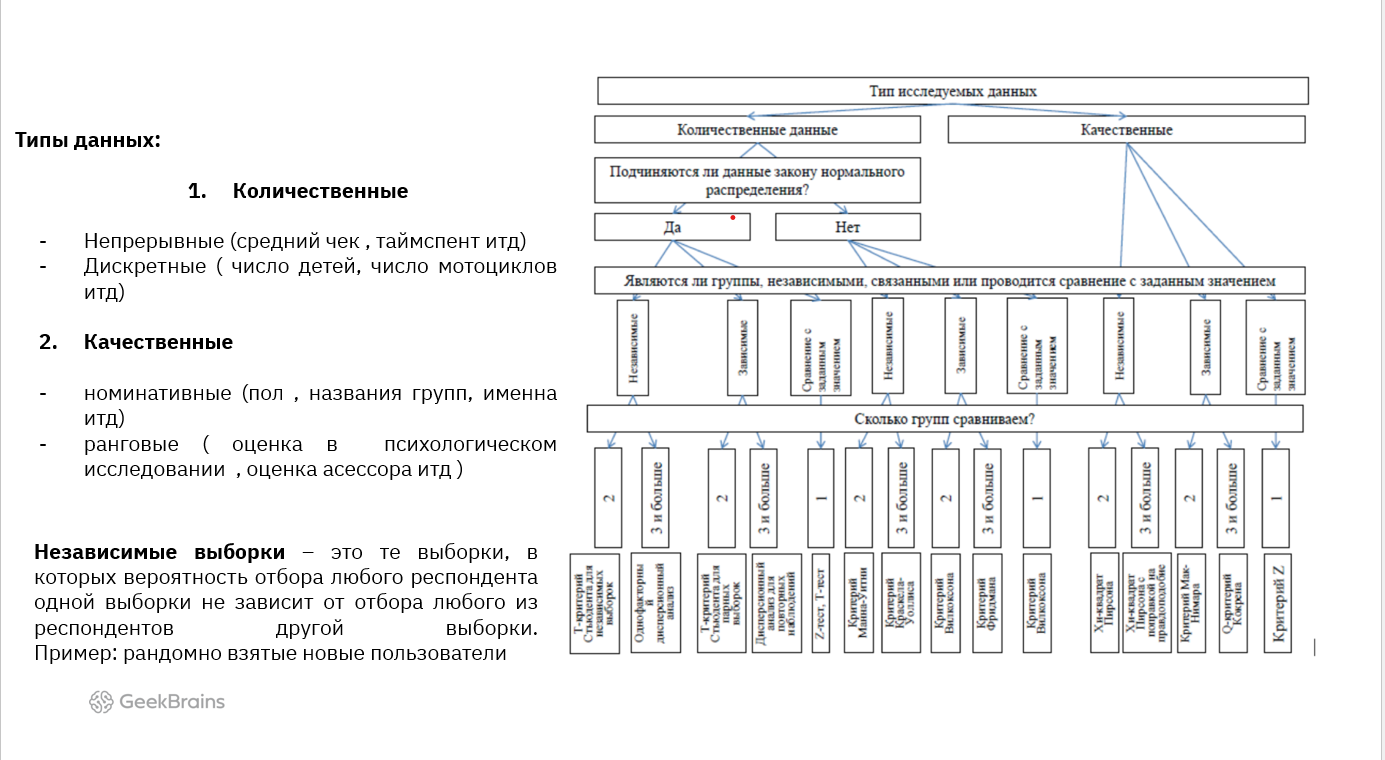

#**5)  Мы провели АБ-тест на увеличение average timespent  per user. По итогам тестирования мы получили следующие данные. Является ли результат статистически значимым с уровнем доверия 80%? Какую версию мы выкатим на продакшн?**

**A) Средняя - 360, отклонение - 40, количество - 9802**

**B) Средняя - 352, отклонение - 58, количество - 9789**

РЕШЕНИЕ:

Для непрерывной метрики таймспент на юзера будем использовать критерий для средних значений двухвыборочный t-критерий для нормального расределения или Манна-Уитни для случая не выполнения условий нормальности.

Рассмотрим t критерий
H0: a_sr=b_sr H1: a_sr!=b_sr

рассчитаем наблюдаемое t_набл

In [6]:
a_sr=360
b_sr=352
a_v=40*40
b_v=58*58
alpha=0,2
n_a=9802
n_b=9789
n=n_a+n_b
t_emp=(a_sr-b_sr) / np.sqrt(a_v/n_a+b_v/n_b)
t_emp

11.236630785707332

Табличные значения критические посчитать не удалось

In [ ]:
t_a=stats.t.ppf(alpha/2, df=(n-1))
t_b=stats.t.ppf(1-alpha/2, df=(n-1))
t_a, t_b

Обратимся к калькулятору - выбираем вариант A.

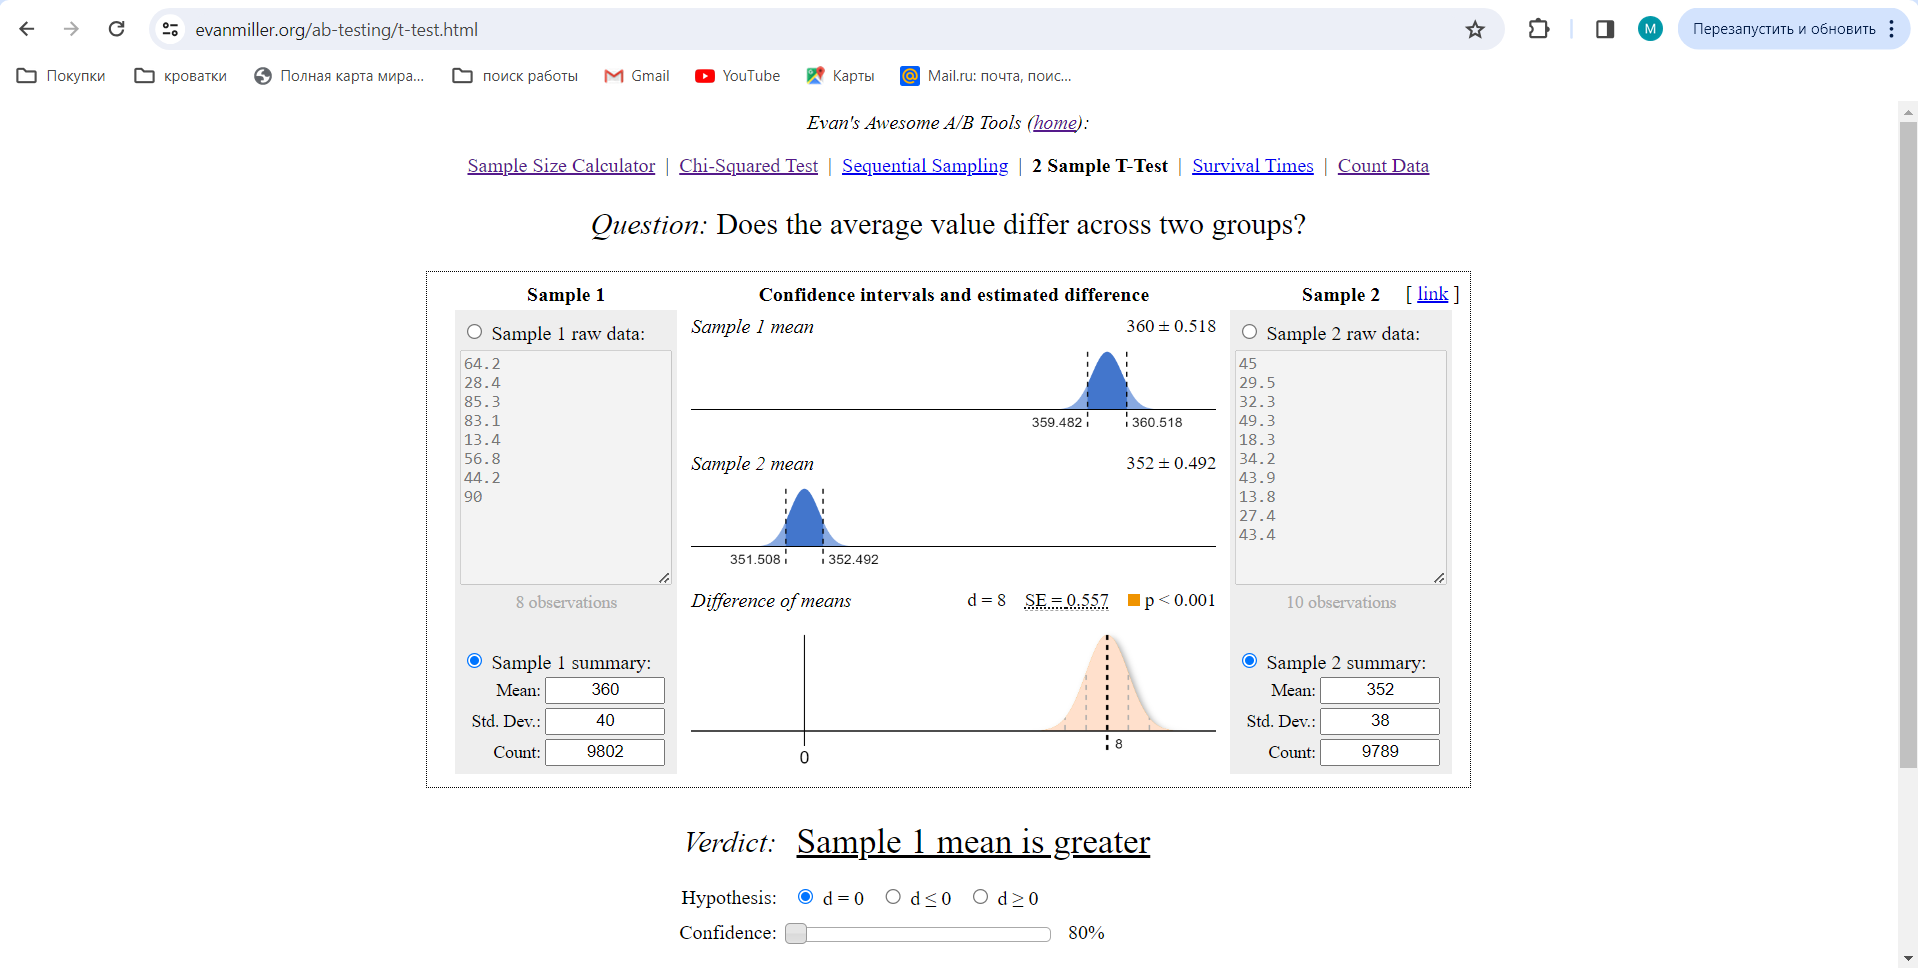

Критерий Манна-Уитни без данных выборок не посчитать.

**Выбираем версию A выкатить в продакшн.**